In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0

    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness


In [4]:
def createRoute(cityList):
    route=random.sample(cityList[1:], len(cityList)-1)
    route.insert(0, cityList[0])
    # route = random.sample(cityList, len(cityList))
    return route


In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population


In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)


In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i, 3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults


In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool


In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


In [11]:
def mutate(individual, mutationRate):
    n = len(individual)
    if(True):
        # for i in range (n-1):
        #     for j in range(i+1, n-1):
        #        mind = (individual[0:i+1],individual[j:i:-1],individual[j+1:])
        #        individual = mind
        individual = two_opt(individual)
    return individual


# def mutate(individual, mutationRate):
#     for swapped in range(len(individual)):
#         if(random.random() < mutationRate):
#             swapWith = int(random.random() * len(individual))

#             city1 = individual[swapped]
#             city2 = individual[swapWith]

#             individual[swapped] = city2
#             individual[swapWith] = city1
#     return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration


In [20]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []

    distance = (1 / rankRoutes(pop)[0][1])
    progress.append(distance)
    print(f"Initial distance:   {distance}")
    
    # Best first route
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    # print(bestRoute)
    plotRoute(bestRoute, "Best Initial Route")




    for i in range(0, generations):
        print(f"Current gen {i}")
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        print(f"current best : {1 / rankRoutes(pop)[0][1]}")


    # Best final route.
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    plotRoute(bestRoute, "Best Found Route")


    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

    return bestRoute




In [15]:
def plotRoute(bestRoute, title=""):
    bestRoute.append(bestRoute[0])
    bestRoute = np.array([list([i.x, i.y])for i in bestRoute])

    # plot best initial route
    plt.plot(bestRoute[:,0], bestRoute[:,1], marker='o')
    plt.title(title)
    plt.show()

In [16]:
cityList = []

for i in range(0, 50):
    cityList.append(City(x=int(random.random() * 200),
                    y=int(random.random() * 200)))


Initial distance:   4653.329271494321


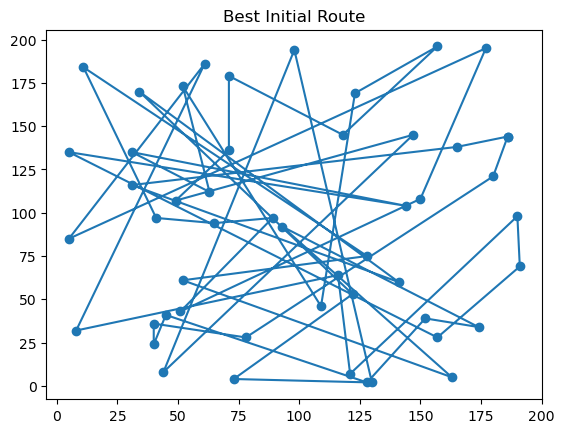

Current gen 0
current best : 4396.752244901944
Current gen 1
current best : 4138.641398267671
Current gen 2
current best : 3863.217876586883
Current gen 3
current best : 3621.966636538426
Current gen 4
current best : 3387.4346250892045
Current gen 5
current best : 3158.2524809320394
Current gen 6
current best : 2968.7080395946787
Current gen 7
current best : 2820.819733707831
Current gen 8
current best : 2679.2857695367165
Current gen 9
current best : 2541.2644588473695
Current gen 10
current best : 2421.7386750021847
Current gen 11
current best : 2322.1690452206585
Current gen 12
current best : 2221.82834718186
Current gen 13
current best : 2130.1797216353534
Current gen 14
current best : 2042.6289965475555
Current gen 15
current best : 1963.0331823541342
Current gen 16
current best : 1886.6686554342734
Current gen 17
current best : 1820.6854402505276
Current gen 18
current best : 1752.0797106722252
Current gen 19
current best : 1695.3770282919288
Current gen 20
current best : 1658.38

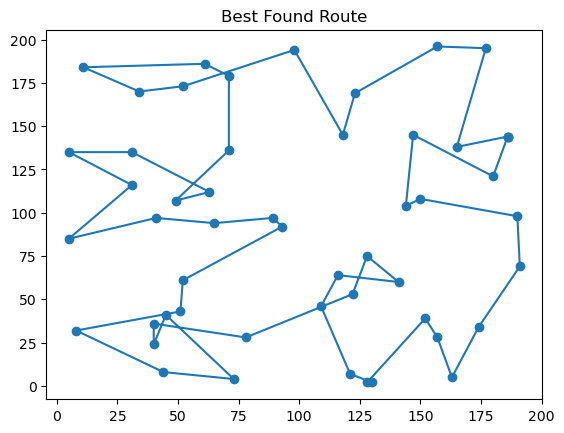

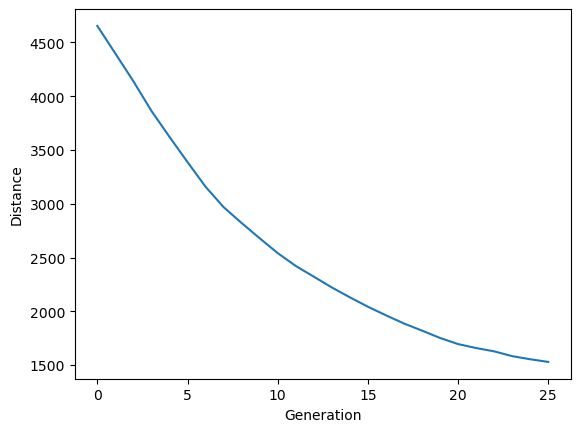

[(186,144),
 (180,121),
 (147,145),
 (144,104),
 (150,108),
 (190,98),
 (191,69),
 (174,34),
 (163,5),
 (157,28),
 (152,39),
 (128,2),
 (130,2),
 (121,7),
 (109,46),
 (116,64),
 (141,60),
 (128,75),
 (122,53),
 (78,28),
 (40,36),
 (40,24),
 (45,41),
 (73,4),
 (44,8),
 (8,32),
 (51,43),
 (52,61),
 (93,92),
 (89,97),
 (65,94),
 (41,97),
 (5,85),
 (31,116),
 (5,135),
 (31,135),
 (63,112),
 (49,107),
 (71,136),
 (71,179),
 (61,186),
 (11,184),
 (34,170),
 (52,173),
 (98,194),
 (118,145),
 (123,169),
 (157,196),
 (177,195),
 (165,138),
 (186,144),
 (186,144)]

In [21]:
geneticAlgorithm(population=cityList, popSize=10,
                 eliteSize=10, mutationRate=.01, generations=25)


In [ ]:
puntos = [(86, 46), (177, 126), (147, 120), (14, 112), (20, 73), (145, 116), (128, 91), (159, 90), (154, 33), (82, 9), (42, 39), (45, 2), (14, 121),
          (34, 151), (89, 131), (40, 107), (195, 148), (172, 143), (112, 145), (19, 128), (26, 144), (63, 170), (194, 13), (145, 29), (33, 174)]

puntos.append(puntos[0])

res = np.array([list(i) for i in puntos])

# print(res)


plt.plot(res[:,0], res[:,1], marker='o')
# plt.scatter(puntos,puntos[:,1])
# plt.ylabel('Distance')
# plt.xlabel('Generation')
plt.show()

[(102,13), (158,38), (83,78), (180,49), (151,175), (53,107), (8,169), (15,81), (189,102), (152,62), (189,178), (50,92), (21,35), (144,52), (10,181), (1,83), (0,82), (59,151), (135,7), (15,181), (50,111), (140,144), (128,44), (69,36), (179,145), (1,38), (3,137), (7,80), (28,138), (149,118), (164,105), (137,138), (28,52), (157,45), (180,39), (97,78), (182,16), (48,57), (115,124), (172,150), (6,4), (111,34), (59,19), (66,108), (168,92), (4,112), (138,185), (165,19), (113,164), (175,74), (102,13)]


<function matplotlib.pyplot.show(close=None, block=None)>

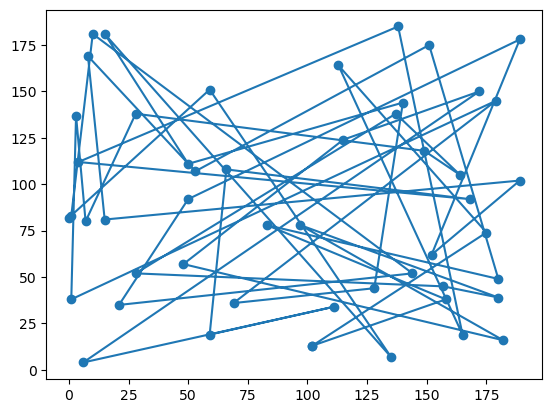

In [ ]:

nl=random.sample(cityList[1:], len(cityList)-1)
nl.insert(0, cityList[0])


nl.append(nl[0])
print(nl)
res = np.array([list([i.x,i.y]) for i in nl])
# print(res )

# print(res[:,0])
plt.plot(res[:,0], res[:,1], marker='o')
plt.show

50375.44595782194


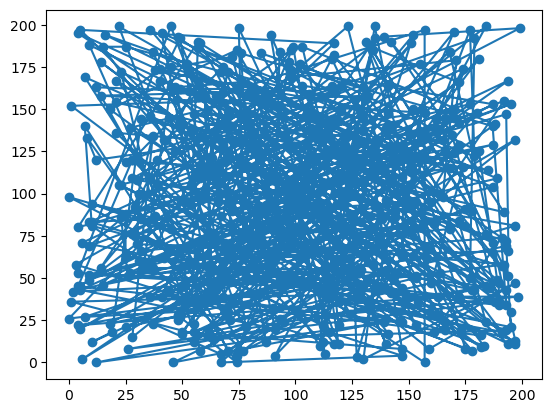

KeyboardInterrupt: 

In [ ]:
nl=random.sample(cityList[:], len(cityList))
# print(nl)
print(Fitness(nl).routeDistance())

plotRoute(nl)


opt2 = twoOpt(nl)
# print(opt2[-1].tolist())
plotRoute(opt2[-1].tolist())
print(Fitness(opt2[-1].tolist()).routeDistance())

opt2 = two_opt(nl)
# print(opt2)
plotRoute(opt2)
print(Fitness(opt2).routeDistance())

for i in range(10):
    opt2 = two_opt(opt2)
    print(Fitness(opt2).routeDistance())


# plotRoute(nl)
# plotRoute(opt2)

In [18]:
def two_opt(route):
     best = route
     improved = True
     while improved:
          improved = False
          for i in range(1, len(route)-1):
               for j in range(i+1, len(route)-1):
                    if j-i == 1: continue  # changes nothing, skip then
                    new_route = route[:]
                    new_route[i:j] = route[j-1:i-1:-1]  # this is the 2woptSwap
                    if Fitness(new_route).routeFitness() > Fitness(best).routeFitness():
                         best = new_route
                         improved = True
     route = best
     return best





In [19]:
def twoOpt(r):
  rutas = [np.array(r)]
  # print(rutas)
  ruta = rutas[-1]
  # print(ruta)
  f = Fitness(ruta).routeDistance()
  opt, n = True, len(ruta)
  while opt:
    opt = False
    for i in range(n-1):
      for j in range(i+1, n-1):
        nruta = np.concatenate((ruta[0:i+1], ruta[j:i:-1], ruta[j+1:]))
        #print(i,j, ruta[0:i+1])
        fn = Fitness(nruta).routeDistance()
        if fn < f:
          rutas.append(nruta)
          ruta = nruta
          f = fn
          opt = True
  return rutas
